# Chargement des librairies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Présentation de la problématique


## Présentation de la base de données

La base de données "UCI_Credit_Card" est une collection de données fournies par l'Université de Californie, Irvine (UCI) via leur répertoire Machine Learning. Cet ensemble de données comprend 30 000 instances avec 25 attributs qui représentent les informations de crédit et de comportement de paiement des clients d'une banque taiwanaise.
L'ensemble de données peut être téléchargé à partir des liens suivants :

- [Lien vers l'ensemble de données sur UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)
- [Lien vers l'ensemble de données sur Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)




## Problématique 

L'objectif principal de notre analyse est de prédire si un client sera en défaut de paiement le mois suivant en se basant sur les informations de crédit et de comportement de paiement fournies. C'est un problème de classification binaire où nous essayons de classer les clients entre ceux qui feront défaut (1) et ceux qui ne le feront pas (0).

## Description des variables

Les variables explicatives de notre modèle sont :

1. `ID`: Identifiant unique attribué à chaque client.

2. `LIMIT_BAL`: Montant du crédit accordé en dollars NT (comprend à la fois le crédit à la consommation individuel et le crédit familial/ supplémentaire).

3. `SEX`: Genre du client (1 = masculin, 2 = féminin).

4. `EDUCATION`: Niveau d'éducation du client (1 = études supérieures, 2 = université, 3 = lycée, 4 = autres).

5. `MARRIAGE`: État matrimonial du client (1 = marié, 2 = célibataire, 3 = autres).

6. `AGE`: Âge du client en années.

7. `PAY_0` à `PAY_6`: Statut de remboursement de septembre à avril respectivement. L'échelle est la suivante: -1 = payer dûment; 1 = retard de paiement d'un mois; 2 = retard de paiement de deux mois, et ainsi de suite jusqu'à 8 = retard de paiement de huit mois; 9 = retard de paiement de neuf mois et plus.

8. `BILL_AMT1` à `BILL_AMT6`: Montant de la facture en dollars NT (montant du relevé de facture) de septembre à avril respectivement.

9. `PAY_AMT1` à `PAY_AMT6`: Montant des paiements précédents en dollars NT de septembre à avril respectivement.

La variable à prédire est `default.payment.next.month`, qui est un indicateur de défaut de paiement du mois prochain (1 = oui, 0 = non). 

Notre objectif est d'utiliser les variables explicatives pour prédire précisément la variable à expliquer en utilisant des techniques de machine learning appropriées.


# Importer et décrire la base de données

In [3]:
# Charger le dataset
df = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# Analyse des valeurs manquantes
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
# Description de la base de données
df.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


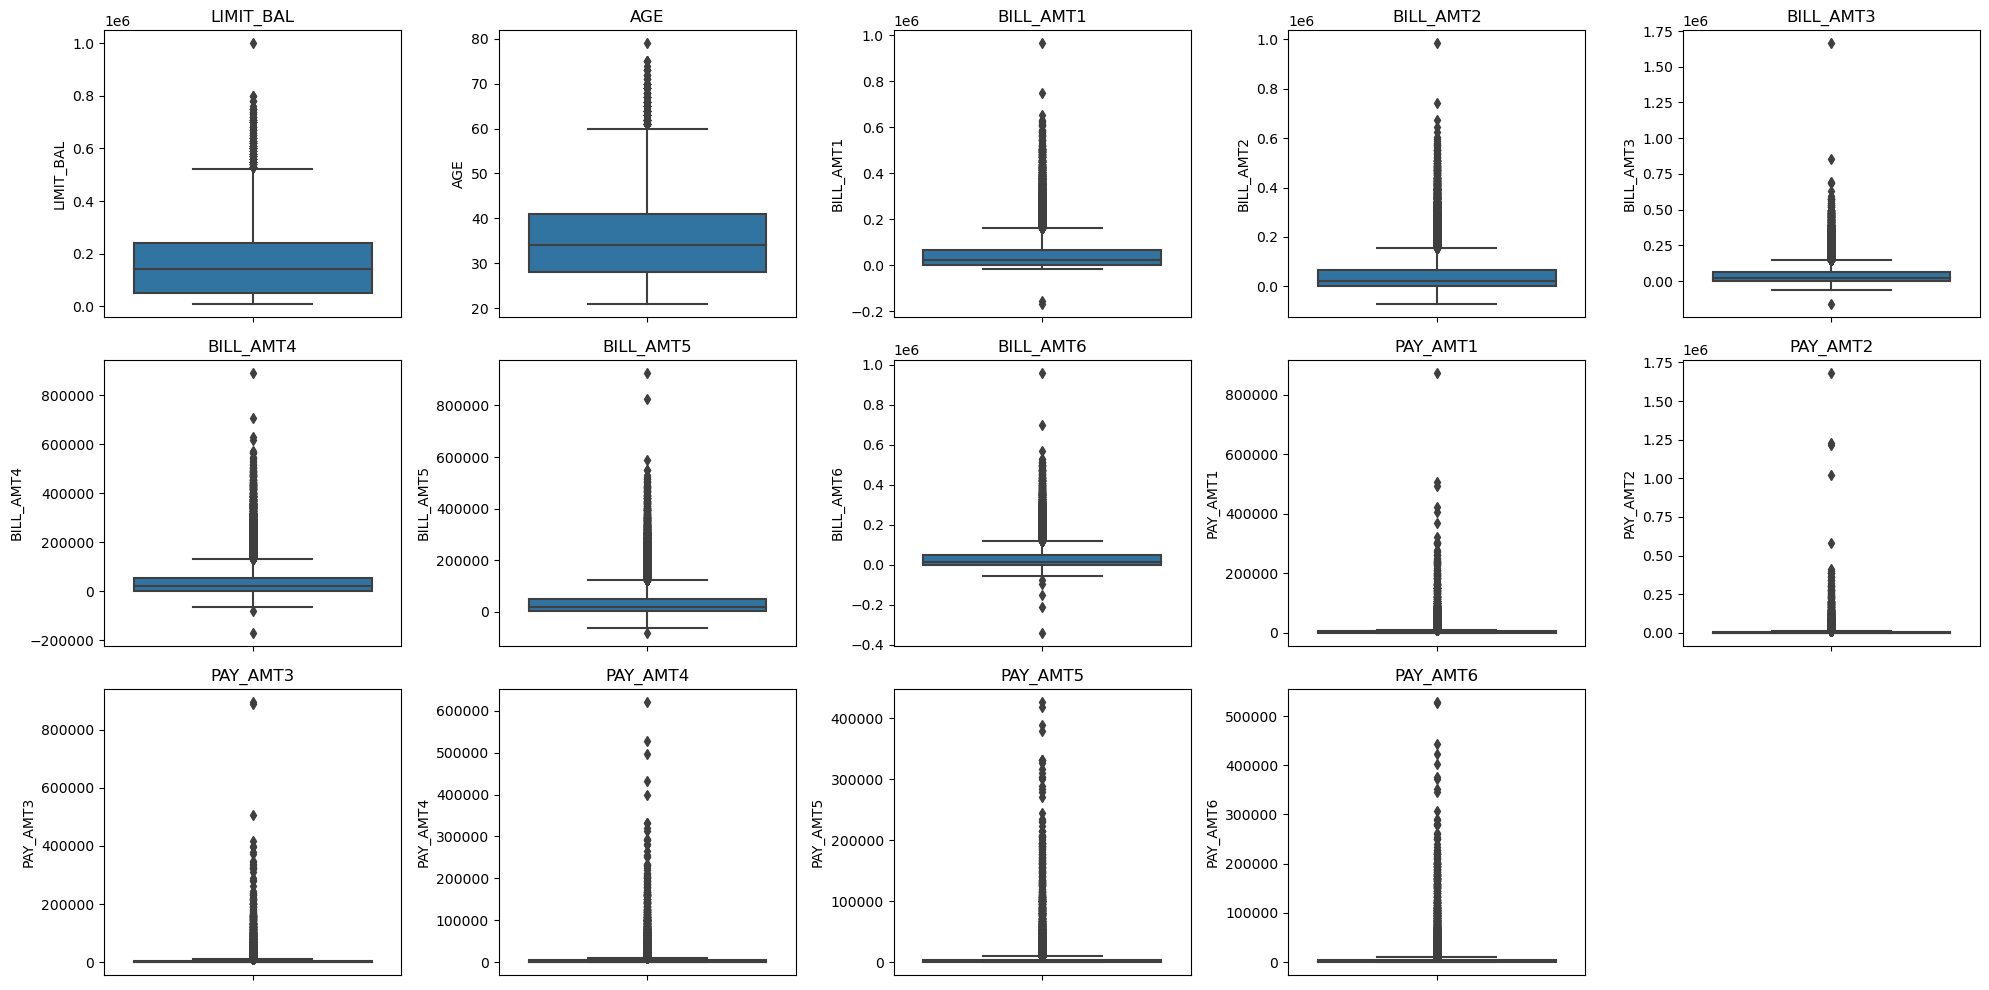

In [8]:
# Variables quantitatives à afficher
quant_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
              'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Créer une figure
plt.figure(figsize=(20,10))

# Créer un boxplot pour chaque variable quantitative
for i, var in enumerate(quant_vars):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data = df, y = var)
    plt.title(var)

# Afficher la figure
plt.tight_layout()
plt.show()

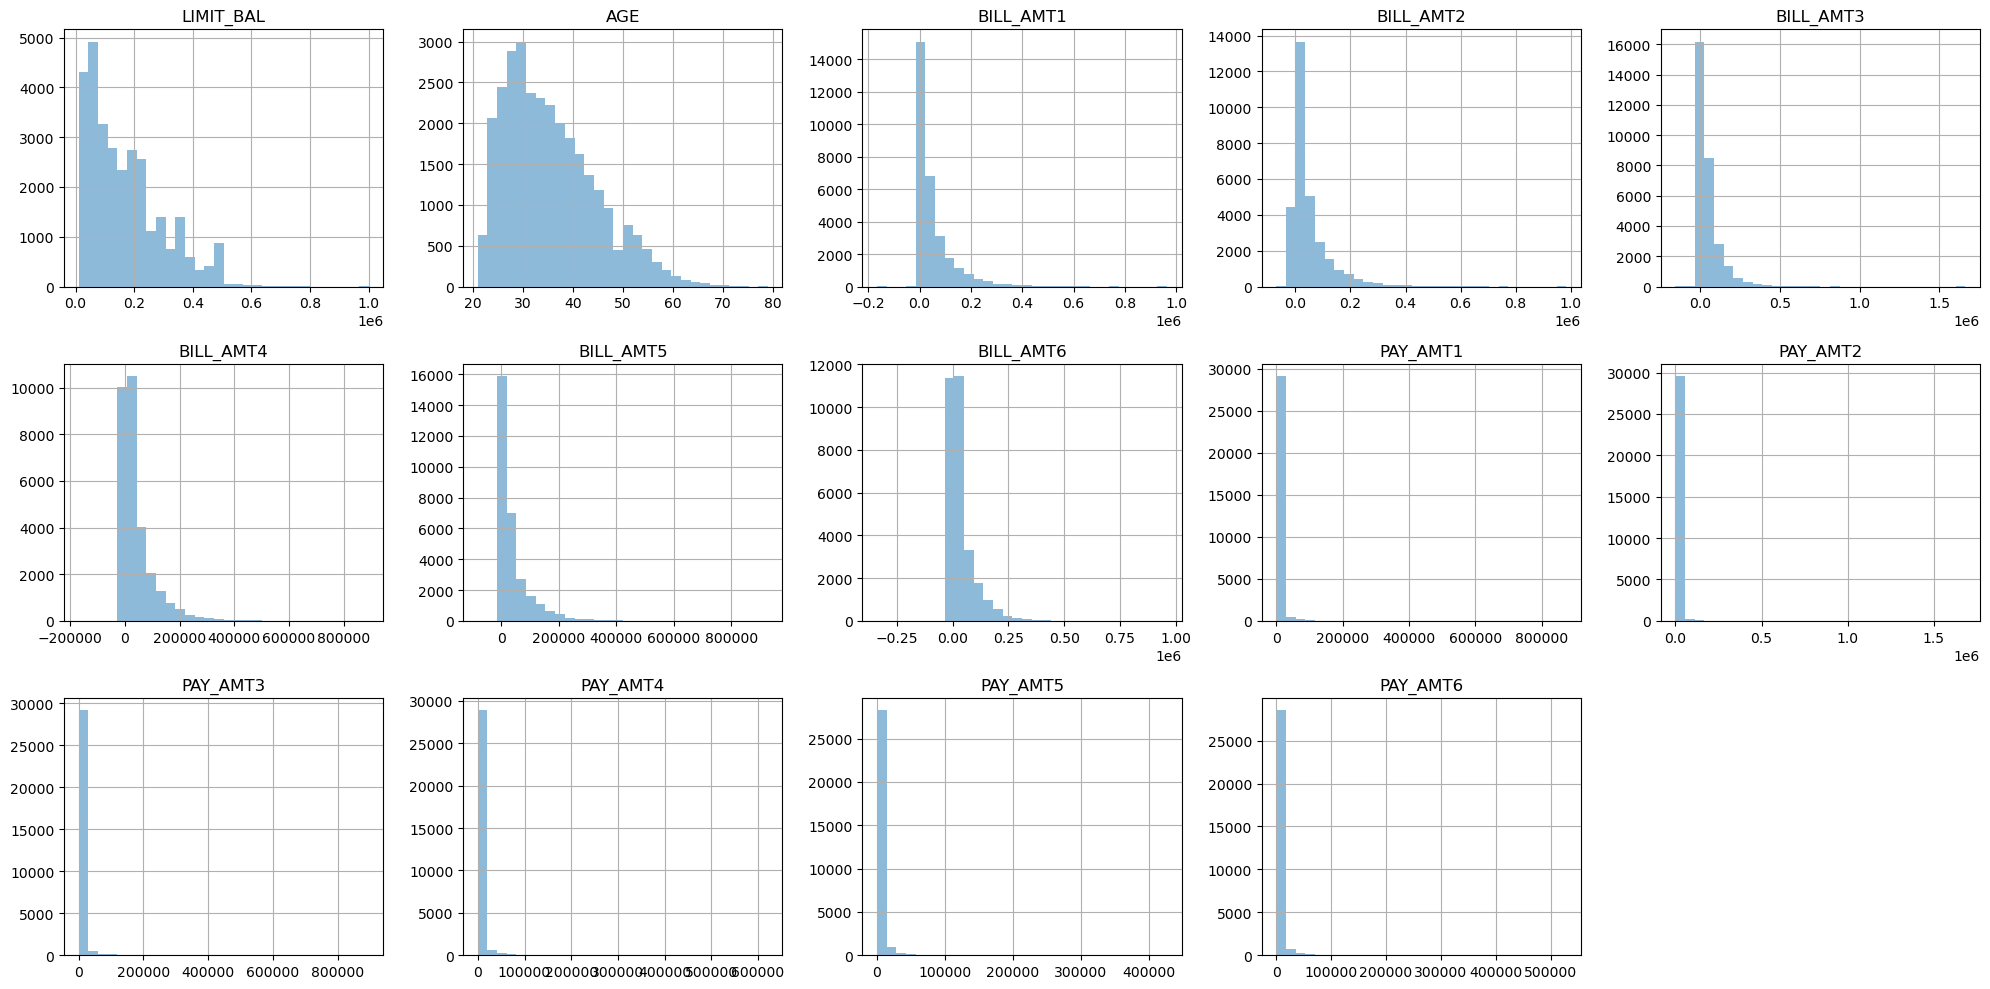

In [9]:
# Créer une figure
plt.figure(figsize=(20,10))

# Créer un histogramme pour chaque variable quantitative
for i, var in enumerate(quant_vars):
    plt.subplot(3, 5, i+1)
    df[var].hist(bins=30, alpha=0.5)
    plt.title(var)

# Afficher la figure
plt.tight_layout()
plt.show()

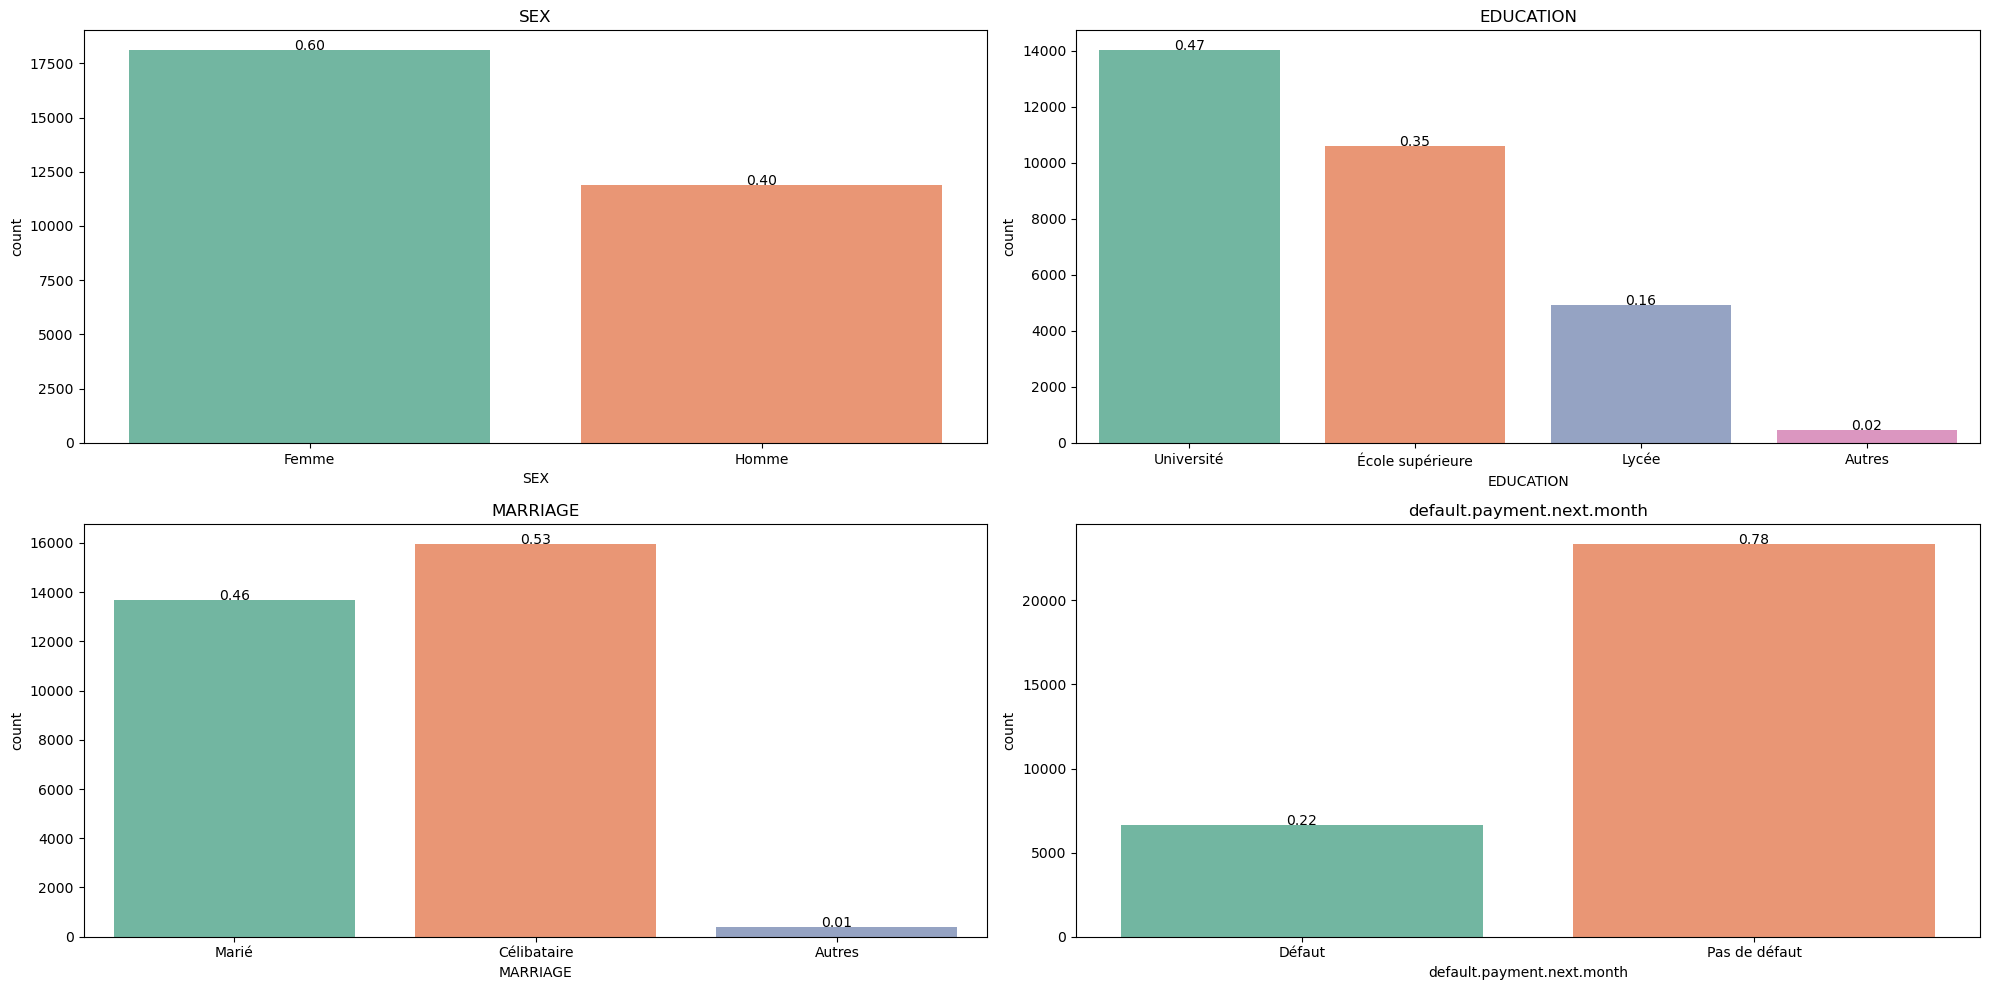

In [10]:
# Variables qualitatives à afficher avec leurs significations respectives
qual_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']
labels = {
    'SEX': {1: 'Homme', 2: 'Femme'},
    'EDUCATION': {1: 'École supérieure', 2: 'Université', 3: 'Lycée', 4: 'Autres',5:'Autres',6:'Autres',0:'Autres'},
    'MARRIAGE': {1: 'Marié', 2: 'Célibataire', 3: 'Autres',0:'Autres'},
    'default.payment.next.month': {0: 'Pas de défaut', 1: 'Défaut'}
}

# Créer une copie du dataframe avec les labels des variables qualitatives
df_copy = df.copy()
df_copy.replace(labels, inplace=True)

# Créer une figure
plt.figure(figsize=(20,10))

# Créer un barplot pour chaque variable qualitative
for i, var in enumerate(qual_vars):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(data=df_copy, x=var, palette="Set2")
    plt.title(var)

    # Ajouter les proportions
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

# Afficher la figure
plt.tight_layout()
plt.show()






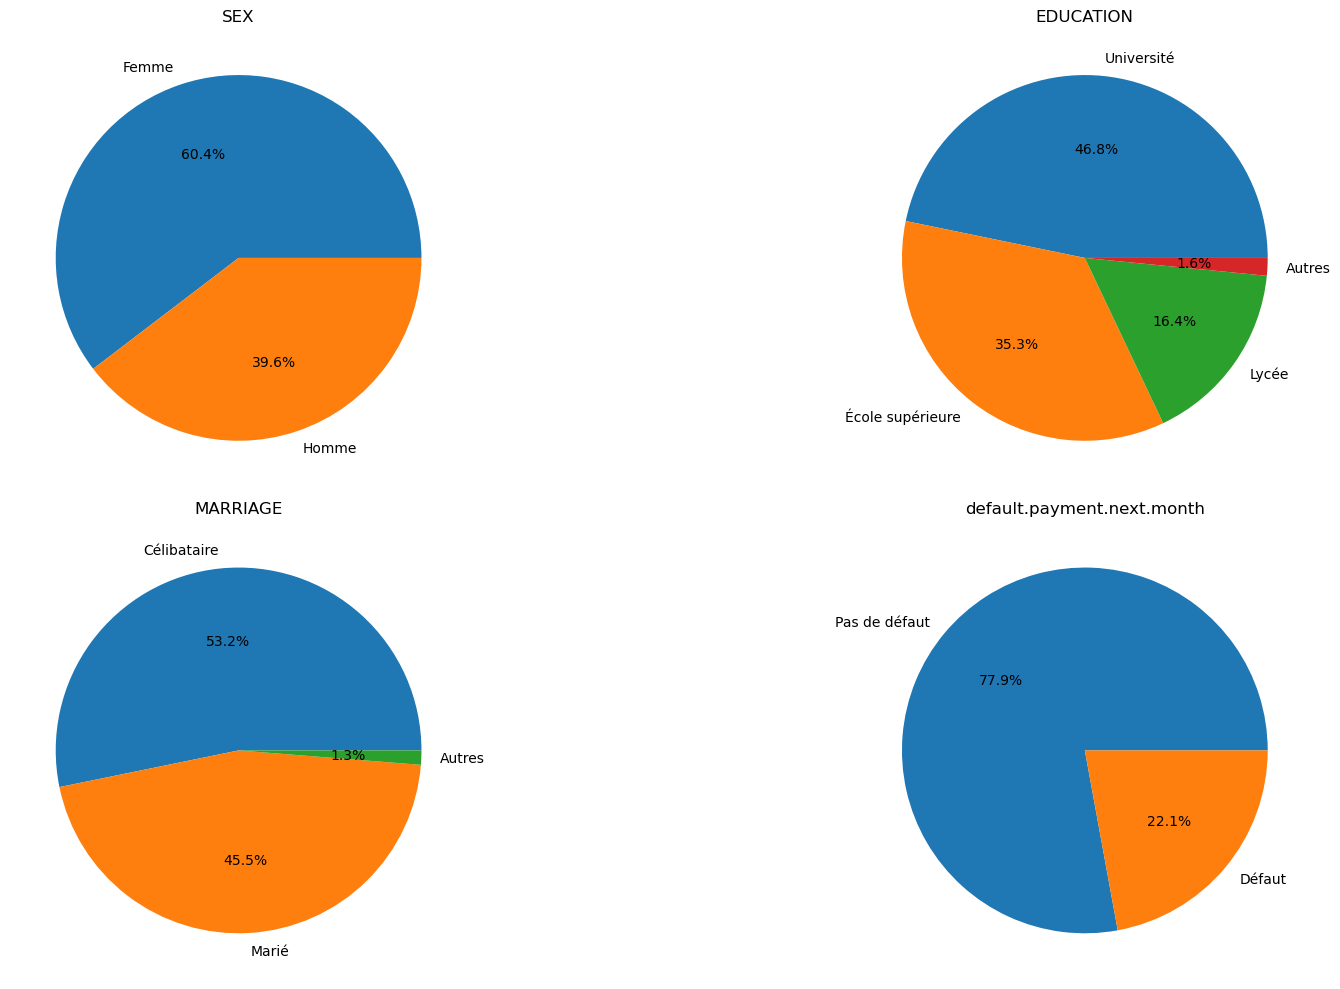

In [11]:
# Créer une figure
plt.figure(figsize=(20,10))

# Créer un piechart pour chaque variable qualitative
for i, var in enumerate(qual_vars):
    plt.subplot(2, 2, i+1)
    df_copy[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.ylabel('')

# Afficher la figure
plt.tight_layout()
plt.show()

# Analyses bivariées

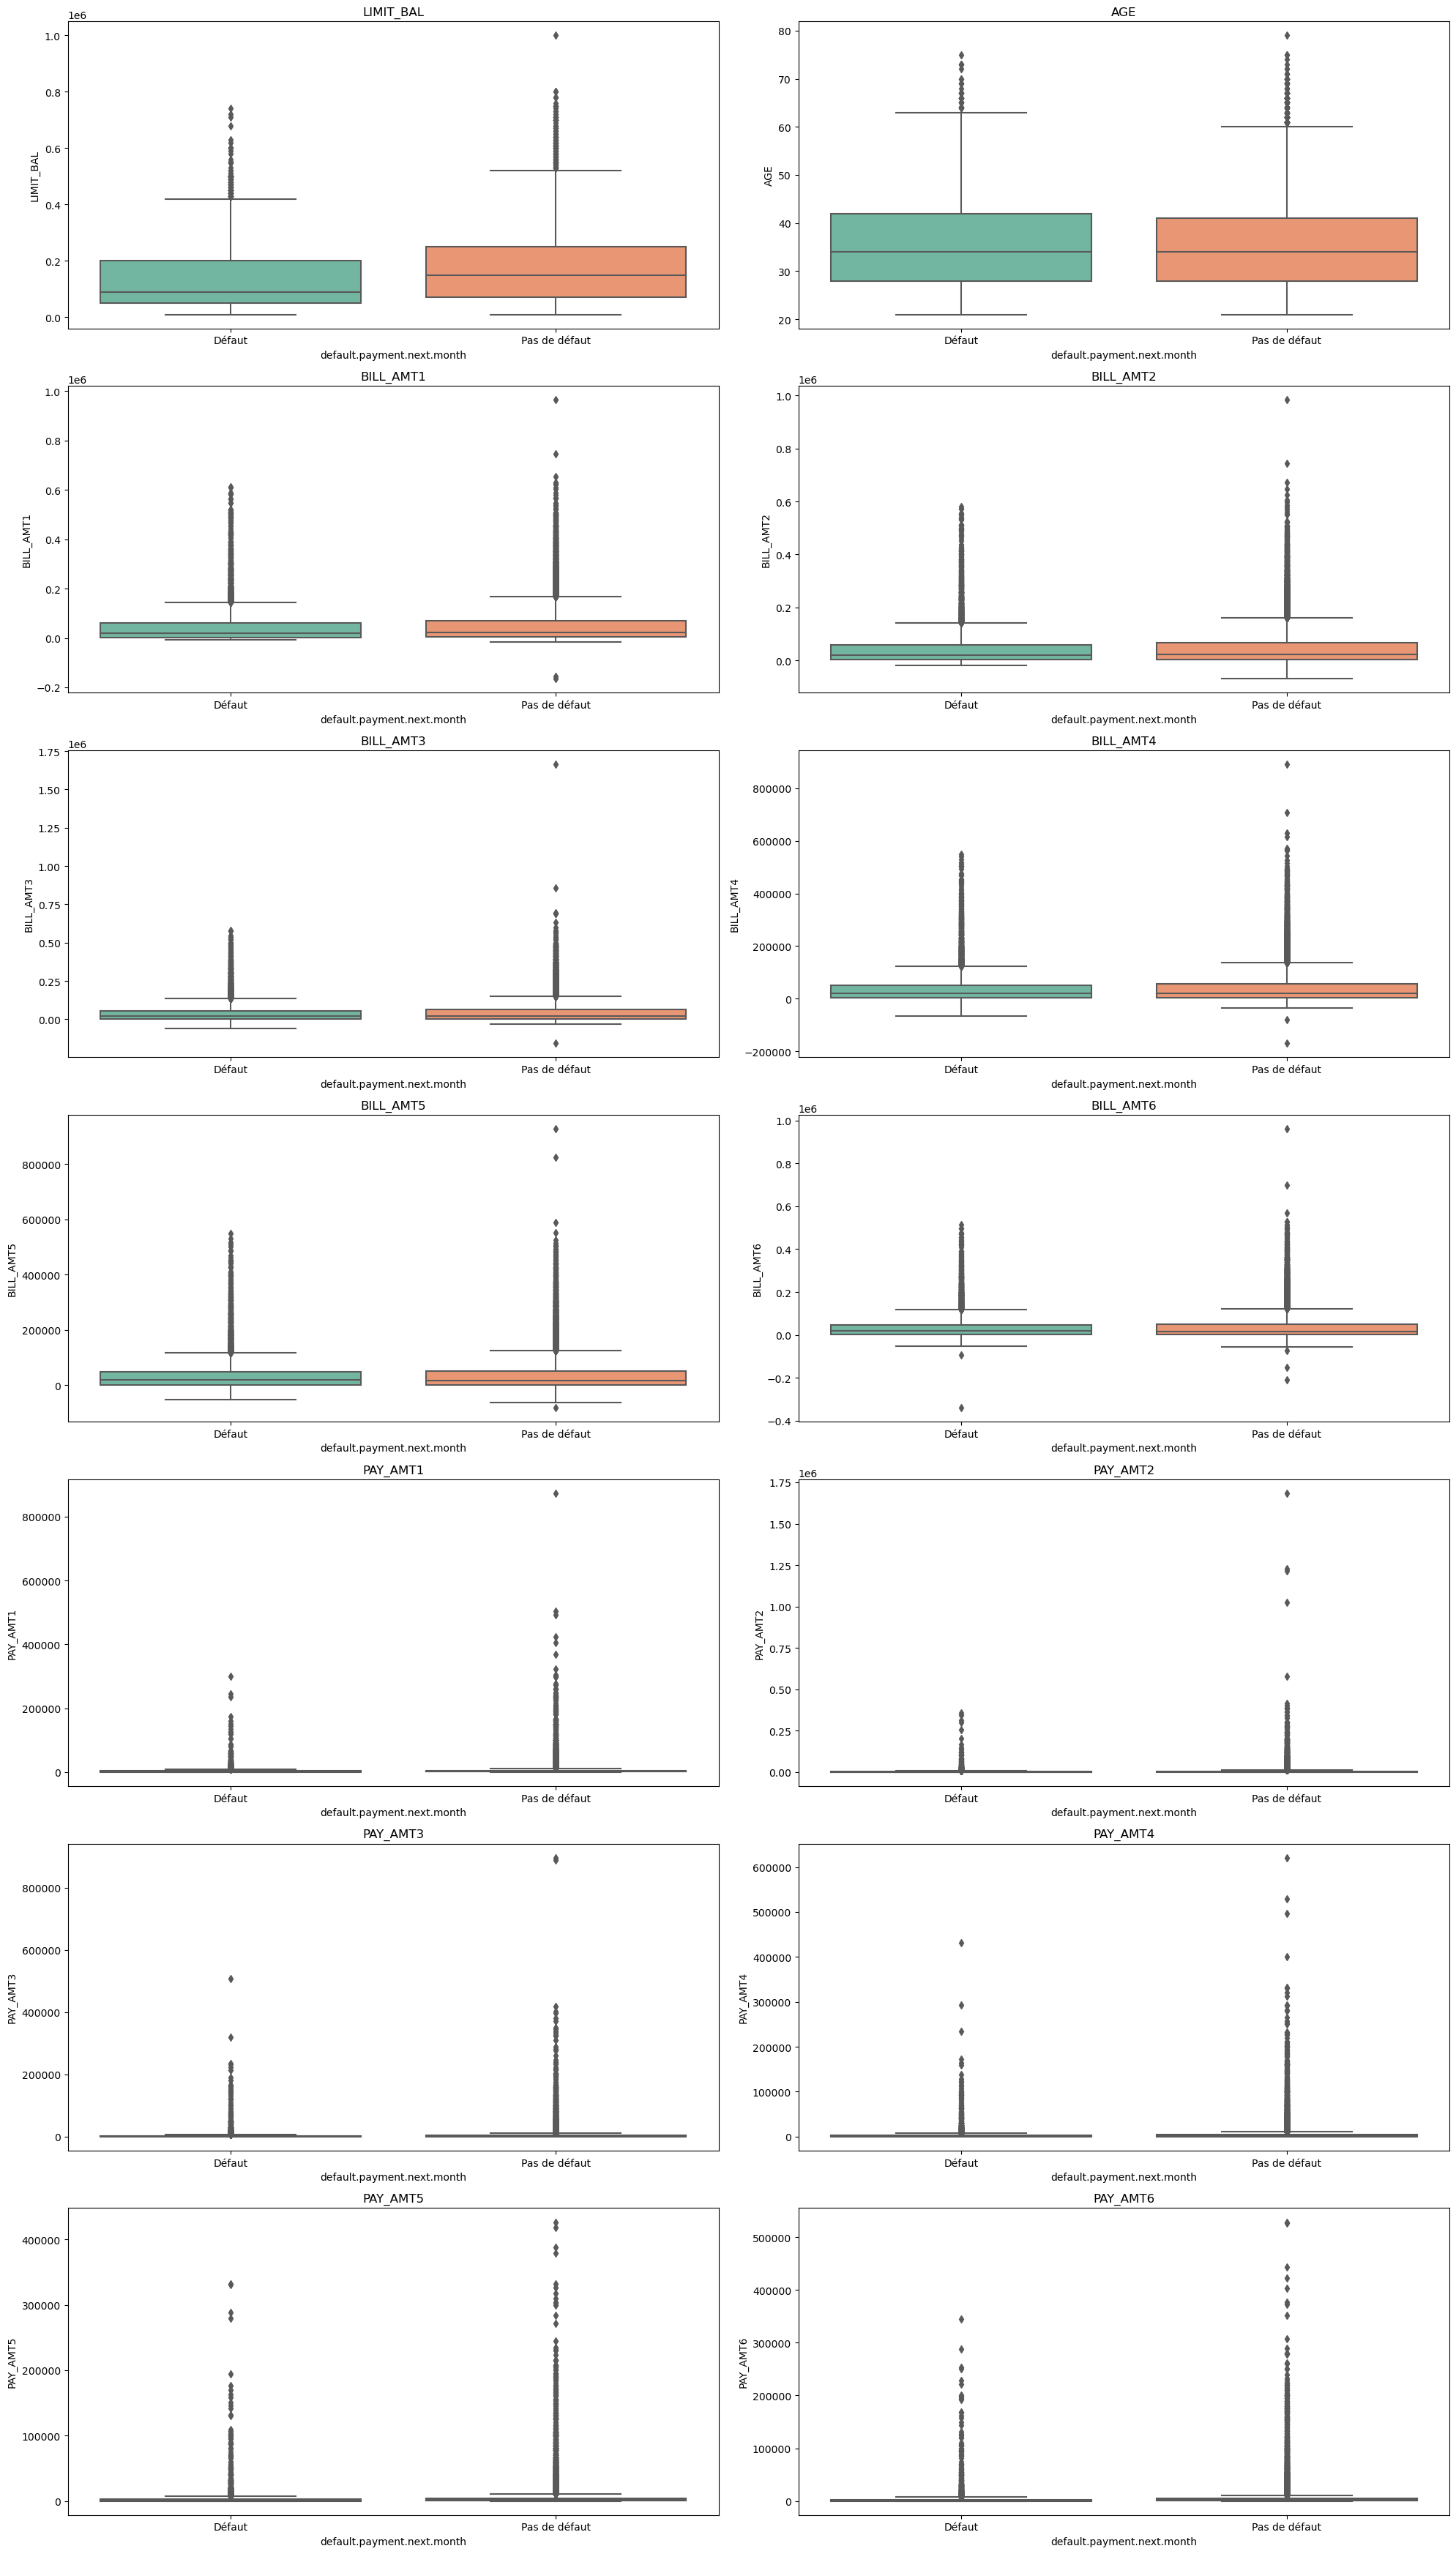

In [12]:


# Créer une figure
plt.figure(figsize=(20,35))

# Créer un boxplot pour chaque variable quantitative
for i, var in enumerate(quant_vars):
    plt.subplot(7, 2, i+1)
    sns.boxplot(data = df_copy, x = 'default.payment.next.month', y = var, palette="Set2")
    plt.title(var)

# Afficher la figure
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import kruskal

# Calculer les statistiques de test de Kruskal-Wallis et les p-valeurs pour chaque variable
test_stats = []
p_values = []
for var in quant_vars:
    groups = [df[var][df['default.payment.next.month'] == 0],
              df[var][df['default.payment.next.month'] == 1]]
    test_stat, p_value = kruskal(*groups)
    test_stats.append(test_stat)
    p_values.append(p_value)

# Créer un dataframe pour le classement des variables
ranking_df = pd.DataFrame({'Variable': quant_vars, 'Test Statistic': test_stats, 'p-value': p_values})
ranking_df.sort_values('Test Statistic', ascending=False, inplace=True)

# Afficher le tableau de classement
print(ranking_df)


     Variable  Test Statistic        p-value
0   LIMIT_BAL      862.756409  1.225520e-189
8    PAY_AMT1      772.715560  4.616556e-170
9    PAY_AMT2      683.802429  9.954766e-151
10   PAY_AMT3      582.851233  8.992533e-129
11   PAY_AMT4      491.339268  7.284564e-109
13   PAY_AMT6      442.441975   3.184062e-98
12   PAY_AMT5      407.762871   1.124851e-90
2   BILL_AMT1       19.242804   1.151034e-05
3   BILL_AMT2        7.257338   7.061188e-03
4   BILL_AMT3        4.815637   2.820264e-02
5   BILL_AMT4        2.095146   1.477676e-01
6   BILL_AMT5        1.408132   2.353667e-01
1         AGE        0.795297   3.725031e-01
7   BILL_AMT6        0.000174   9.894802e-01


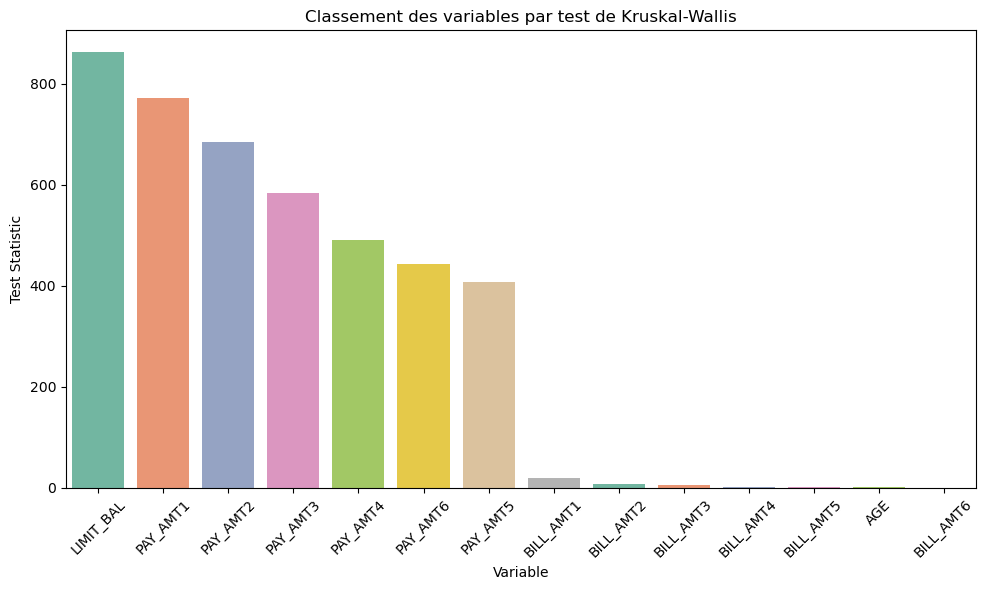

In [14]:

# Créer un graphique de classement
plt.figure(figsize=(10, 6))
sns.barplot(data=ranking_df, x='Variable', y='Test Statistic', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Variable')
plt.ylabel('Test Statistic')
plt.title('Classement des variables par test de Kruskal-Wallis')
plt.tight_layout()
plt.show()

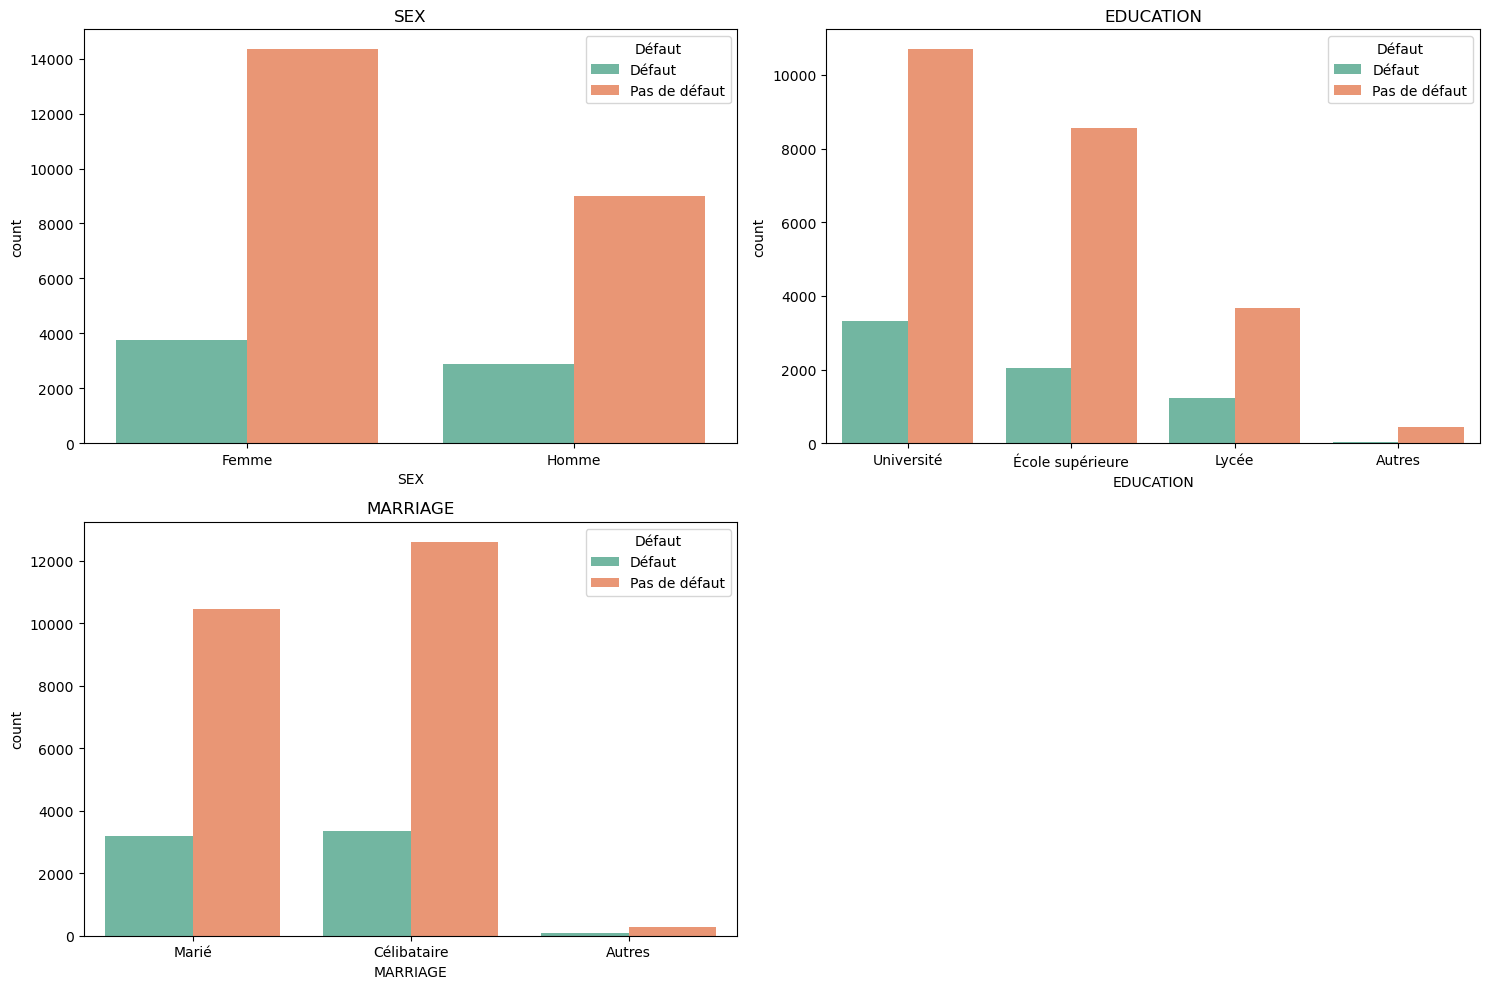

In [15]:
# Variables qualitatives à inclure
qual_vars = ['SEX', 'EDUCATION', 'MARRIAGE']


# Créer une figure
plt.figure(figsize=(15, 10))

# Créer des graphiques bivariés entre variables qualitatives et défaut
for i, var in enumerate(qual_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df_copy, x=var, hue='default.payment.next.month', palette='Set2')
    plt.title(var)
    plt.legend(title='Défaut')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [16]:
import numpy as np
from scipy.stats import chi2_contingency

# Calculer la statistique de test du khi-deux, la p-valeur et le V de Cramer pour chaque variable qualitative
stats = []
for var in qual_vars:
    contingency_table = pd.crosstab(df_copy[var], df_copy['default.payment.next.month'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    num_rows, num_cols = contingency_table.shape
    v_cramer = np.sqrt(chi2 / (df_copy.shape[0] * min(num_rows - 1, num_cols - 1)))
    stats.append([var, chi2, p_value, v_cramer])

# Créer un dataframe pour les statistiques
stats_df = pd.DataFrame(stats, columns=['Variable', 'Chi-square', 'p-value', 'V Cramer'])
stats_df.sort_values('p-value', ascending=True, inplace=True)

# Afficher le tableau
print(stats_df)

    Variable  Chi-square       p-value  V Cramer
1  EDUCATION  160.409951  1.495065e-34  0.073123
0        SEX   47.708797  4.944679e-12  0.039878
2   MARRIAGE   28.130325  7.790720e-07  0.030622


# Première version des SVM sans optimisation

## Préparation des données

In [17]:
from sklearn.preprocessing import StandardScaler

# Division de la base de données en train et en test
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']



In [18]:
## One hot encoding des variables qualitatives
# Effectuer le One-Hot Encoding sur les variables qualitatives
X_encoded = pd.get_dummies(X, columns=qual_vars, drop_first=True)
X_encoded.describe(include="all")

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,0.603733,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.455300,0.532133,0.010767
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,0.489129,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.498006,0.498975,0.103204
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_encoded.isnull().sum()

In [19]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [20]:
# Sélectionner les variables quantitatives dans l'ensemble d'entraînement
X_train_quant = X_train[quant_vars]

# Appliquer le StandardScaler sur les variables quantitatives de l'ensemble d'entraînement
scaler = StandardScaler()

X_train_quant_scaled = scaler.fit_transform(X_train_quant)


# Créer un DataFrame avec les variables quantitatives mises à l'échelle
X_train_scaled = pd.DataFrame(X_train_quant_scaled, columns=quant_vars).reset_index(drop=True)

# Sélectionner les variables qualitatives dans l'ensemble d'entraînement
X_train_nonquant = X_train.drop(quant_vars, axis=1).reset_index(drop=True)

# Concaténer les variables quantitatives mises à l'échelle avec les variables qualitatives de l'ensemble d'entraînement
X_train_encoded = pd.concat([X_train_scaled, X_train_nonquant], axis=1)
# Définir l'index sur la colonne "ID"
X_train_encoded.set_index('ID', inplace=True)

In [21]:
# Appliquer le StandardScaler sur les variables quantitatives de l'ensemble de test
X_test_quant_scaled = scaler.transform(X_test[quant_vars])

# Créer un DataFrame avec les variables quantitatives mises à l'échelle de l'ensemble de test
X_test_scaled = pd.DataFrame(X_test_quant_scaled, columns=quant_vars).reset_index(drop=True)
# Sélectionner les variables qualitatives dans l'ensemble d'entraînement
X_test_nonquant = X_test.drop(quant_vars, axis=1).reset_index(drop=True)
# Concaténer les variables quantitatives mises à l'échelle avec les variables qualitatives de l'ensemble de test
X_test_encoded = pd.concat([X_test_scaled, X_test_nonquant], axis=1)
X_test_encoded.set_index('ID', inplace=True)

## Création du modèle

In [22]:
## Création du modèle
from sklearn.svm import SVC
# Créer un modèle SVM
svm_model = SVC()

# Entraîner le modèle SVM sur les données d'entraînement mises à l'échelle
svm_model.fit(X_train_encoded, y_train)


SVC()

## Prédiction et performance du modèle

In [23]:
# Faire des prédictions sur l'ensemble d'entraînement et de test
y_train_pred = svm_model.predict(X_train_encoded)
y_test_pred = svm_model.predict(X_test_encoded)



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculer les mesures d'évaluation pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, svm_model.decision_function(X_train_encoded))


In [25]:
# Calculer les mesures d'évaluation pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, svm_model.decision_function(X_test_encoded))


In [26]:

# Créer un tableau avec les mesures d'évaluation
evaluation_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1_score, train_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

# Afficher le tableau des performances
print(evaluation_table)

    Métrique     Train      Test
0   Accuracy  0.825083  0.819167
1  Precision  0.705667  0.673252
2     Recall  0.362577  0.337395
3   F1 Score  0.479027  0.449518
4        AUC  0.787779  0.716497


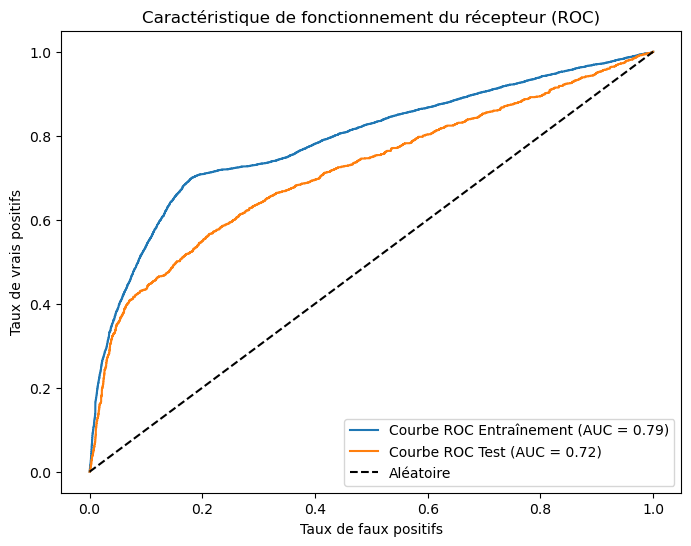

In [27]:
# Créer les courbes ROC pour les ensembles d'entraînement et de test
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, svm_model.decision_function(X_train_encoded))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, svm_model.decision_function(X_test_encoded))

# Calculer les AUC pour les ensembles d'entraînement et de test
auc_train = roc_auc_score(y_train, svm_model.decision_function(X_train_encoded))
auc_test = roc_auc_score(y_test, svm_model.decision_function(X_test_encoded))

# Afficher les courbes ROC avec les valeurs d'AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Courbe ROC Entraînement (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Courbe ROC Test (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Caractéristique de fonctionnement du récepteur (ROC)')
plt.legend(loc='lower right')
plt.show()

# SVM avec optiimisation des paramètres


Les meilleurs paramètres à optimiser pour un modèle SVM sont les suivants :

1. **C (Coefficient de régularisation)** : Ce paramètre contrôle **la marge d'erreur du modèle SVM**. 
Une valeur plus élevée de C permettra au modèle de classer correctement un maximum d'échantillons d'entraînement, mais peut entraîner un surajustement. Une valeur plus faible de C permettra au modèle d'avoir une marge d'erreur plus importante, ce qui peut améliorer la généralisation du modèle. Il est conseillé d'explorer différentes valeurs de C, telles que 0.1, 1 et 10, pour trouver la meilleure valeur qui correspond à votre jeu de données.



2. **Kernel (Noyau)** : Le noyau détermine la transformation de l'espace des variables explicatives dans lequel le modèle SVM effectue la séparation des classes. Les noyaux couramment utilisés sont les suivants :
   - Linear (linéaire) : Ce noyau est adapté aux problèmes de classification linéairement séparables.
   - RBF (Radial Basis Function) : Ce noyau est adapté aux problèmes de classification non linéairement séparables. Il utilise une fonction de base radiale pour projeter les données dans un espace de dimension supérieure.
   - Polynomial (polynomial) : Ce noyau est également utilisé pour la classification non linéaire. Il utilise une fonction polynomiale pour projeter les données dans un espace de dimension supérieure.
   
   

3. **Gamma** : Le paramètre gamma contrôle l'influence d'un échantillon unique sur la frontière de décision. Une valeur plus élevée de gamma donnera plus de poids aux échantillons proches de la frontière de décision, ce qui peut conduire à un surajustement. Une valeur plus faible de gamma donnera moins de poids aux échantillons proches de la frontière de décision, ce qui peut améliorer la généralisation du modèle. Les valeurs courantes pour gamma sont 0.1, 1 et 'scale', qui est équivalent à 1/n_features.



L'impact des meilleurs paramètres sur le modèle SVM peut varier en fonction des caractéristiques du jeu de données. Voici quelques points à considérer :

- Une valeur plus élevée de C favorise la précision du modèle, mais peut entraîner un surajustement.
- L'utilisation du noyau RBF permet au modèle SVM de capturer des relations non linéaires entre les variables explicatives.
- Le noyau polynomial permet également de capturer des relations non linéaires et peut être utile lorsque la relation entre les variables est de nature polynomiale.



In [28]:

# Séparer les données de chaque classe
defaut = df[df['default.payment.next.month'] == 1]
sain = df[df['default.payment.next.month'] == 0]

# Sous-échantillonner chaque classe pour obtenir 1000 exemples de chaque classe
defaut_downsampled = defaut.sample(n=1000, random_state=42)
sain_downsampled = sain.sample(n=1000, random_state=42)

# Concaténer les exemples sous-échantillonnés
df_downsampled = pd.concat([defaut_downsampled, sain_downsampled])
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6820 to 15802
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2000 non-null   int64  
 1   LIMIT_BAL                   2000 non-null   float64
 2   SEX                         2000 non-null   int64  
 3   EDUCATION                   2000 non-null   int64  
 4   MARRIAGE                    2000 non-null   int64  
 5   AGE                         2000 non-null   int64  
 6   PAY_0                       2000 non-null   int64  
 7   PAY_2                       2000 non-null   int64  
 8   PAY_3                       2000 non-null   int64  
 9   PAY_4                       2000 non-null   int64  
 10  PAY_5                       2000 non-null   int64  
 11  PAY_6                       2000 non-null   int64  
 12  BILL_AMT1                   2000 non-null   float64
 13  BILL_AMT2                   2

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Variables quantitatives à afficher
quant_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
              'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Variables qualitatives à afficher
qual_vars = ['SEX', 'EDUCATION', 'MARRIAGE']


# Séparer les variables explicatives et la variable à prédire
X = df_downsampled.drop('default.payment.next.month', axis=1)
y = df_downsampled['default.payment.next.month']


## One hot encoding des variables qualitatives
# Effectuer le One-Hot Encoding sur les variables qualitatives
X_encoded = pd.get_dummies(X, columns=qual_vars, drop_first=True)
X_encoded.describe(include="all")


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,14888.245500,156600.000000,36.02200,0.209500,0.029500,-0.009500,-0.058500,-0.135000,-0.164000,51717.58350,...,4754.381000,0.576500,0.501000,0.155500,0.003000,0.004000,0.002000,0.479000,0.505500,0.01450
std,8481.127585,127672.981461,9.63893,1.248354,1.305558,1.314258,1.336028,1.282809,1.291099,78598.74688,...,17531.181668,0.494237,0.500124,0.362471,0.054704,0.063135,0.044688,0.499684,0.500095,0.11957
min,32.000000,10000.000000,21.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3928.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7742.250000,50000.000000,28.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2974.75000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,14973.500000,120000.000000,35.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20559.00000,...,1200.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,21794.250000,220000.000000,42.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63937.25000,...,3500.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
max,29995.000000,700000.000000,73.00000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,630458.00000,...,345293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [30]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [31]:
# Sélectionner les variables quantitatives dans l'ensemble d'entraînement
X_train_quant = X_train[quant_vars]

# Appliquer le StandardScaler sur les variables quantitatives de l'ensemble d'entraînement
scaler = StandardScaler()

X_train_quant_scaled = scaler.fit_transform(X_train_quant)


# Créer un DataFrame avec les variables quantitatives mises à l'échelle
X_train_scaled = pd.DataFrame(X_train_quant_scaled, columns=quant_vars).reset_index(drop=True)

# Sélectionner les variables qualitatives dans l'ensemble d'entraînement
X_train_nonquant = X_train.drop(quant_vars, axis=1).reset_index(drop=True)

# Concaténer les variables quantitatives mises à l'échelle avec les variables qualitatives de l'ensemble d'entraînement
X_train_encoded = pd.concat([X_train_scaled, X_train_nonquant], axis=1)
# Définir l'index sur la colonne "ID"
X_train_encoded.set_index('ID', inplace=True)

In [32]:
# Appliquer le StandardScaler sur les variables quantitatives de l'ensemble de test
X_test_quant_scaled = scaler.transform(X_test[quant_vars])

# Créer un DataFrame avec les variables quantitatives mises à l'échelle de l'ensemble de test
X_test_scaled = pd.DataFrame(X_test_quant_scaled, columns=quant_vars).reset_index(drop=True)
# Sélectionner les variables qualitatives dans l'ensemble d'entraînement
X_test_nonquant = X_test.drop(quant_vars, axis=1).reset_index(drop=True)
# Concaténer les variables quantitatives mises à l'échelle avec les variables qualitatives de l'ensemble de test
X_test_encoded = pd.concat([X_test_scaled, X_test_nonquant], axis=1)
X_test_encoded.set_index('ID', inplace=True)

In [34]:
# Créer un modèle SVM
svm_model = SVC()

# Définir la grille des paramètres à optimiser
param_grid = {
    'C': [0.1,10,100],
    'kernel': ['rbf','linear'],
    'gamma': [0.01,0.1, 1]
}


In [35]:
from sklearn.model_selection import  GridSearchCV
import time
start_time = time.time()
# Recherche des meilleurs paramètres avec validation croisée
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_encoded, y_train)
end_time = time.time()
execution_time = end_time - start_time

In [36]:
# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
print("Meilleurs paramètres : ", best_params)
print("Temps d'exécution : {:.2f} secondes".format(execution_time))

Meilleurs paramètres :  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Temps d'exécution : 41.67 secondes


In [37]:
# Entraîner le modèle SVM avec les meilleurs paramètres sur les données d'entraînement mises à l'échelle
svm_model_opt = SVC(**best_params)
svm_model_opt.fit(X_train_encoded, y_train)

SVC(C=10, gamma=0.01)

In [38]:
# Faire des prédictions sur l'ensemble d'entraînement et de test
y_train_pred = svm_model_opt.predict(X_train_encoded)

y_test_pred = svm_model_opt.predict(X_test_encoded)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculer les mesures d'évaluation pour l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, svm_model_opt.decision_function(X_train_encoded))


In [40]:
# Calculer les mesures d'évaluation pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, svm_model_opt.decision_function(X_test_encoded))


In [41]:

# Créer un tableau avec les mesures d'évaluation
evaluation_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1_score, train_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

# Afficher le tableau des performances
print(evaluation_table)

    Métrique     Train      Test
0   Accuracy  0.747500  0.650000
1  Precision  0.809672  0.703448
2     Recall  0.647940  0.512563
3   F1 Score  0.719834  0.593023
4        AUC  0.832389  0.707993


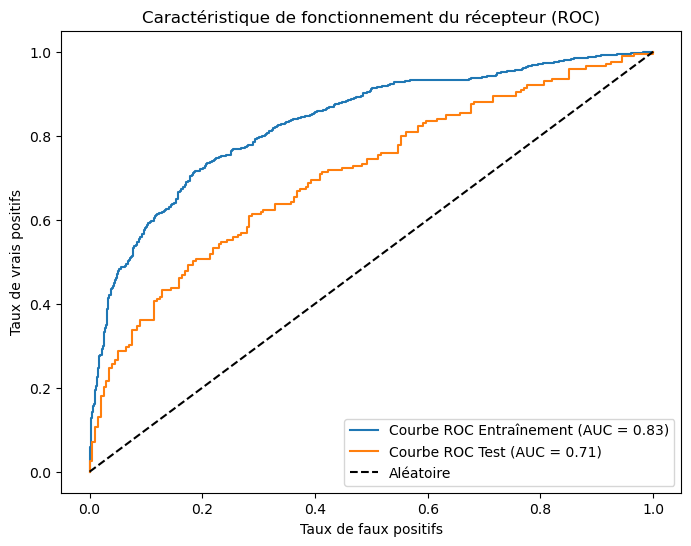

In [42]:
# Créer les courbes ROC pour les ensembles d'entraînement et de test
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, svm_model_opt.decision_function(X_train_encoded))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, svm_model_opt.decision_function(X_test_encoded))

# Calculer les AUC pour les ensembles d'entraînement et de test
auc_train = roc_auc_score(y_train, svm_model_opt.decision_function(X_train_encoded))
auc_test = roc_auc_score(y_test, svm_model_opt.decision_function(X_test_encoded))

# Afficher les courbes ROC avec les valeurs d'AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Courbe ROC Entraînement (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Courbe ROC Test (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Caractéristique de fonctionnement du récepteur (ROC)')
plt.legend(loc='lower right')
plt.show()